# Comparison of different ozone forcing treatments

In [1]:
from fair.forward import fair_scm
from fair.RCPs import rcp85
import matplotlib.pyplot as pl
import numpy as np

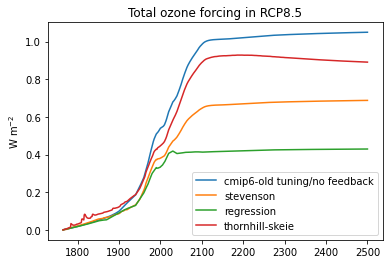

In [2]:
F={}
T={}

beta_ts = np.array([2.33379720e-04,  1.27179106e-03, -6.69347820e-05,
                    1.14647701e-04,  5.14366051e-12,  46/14*1.15151346e-03])
# the original tuning uses NO2 emissions unit; FaIR is in units of N

beta_default = np.array([2.8249e-4, 1.0695e-4, -9.3604e-4, 99.7831e-4])

for ozone_treatment in ['cmip6-old tuning/no feedback', 'stevenson', 'regression', 'thornhill-skeie']:
    if ozone_treatment=='thornhill-skeie':
        b_tro3 = beta_ts
    else:
        b_tro3 = beta_default
    _,F[ozone_treatment],T[ozone_treatment] = fair_scm(
        emissions = rcp85.Emissions.emissions,
        tropO3_forcing=ozone_treatment,
        diagnostics='AR6',
        efficacy=np.ones(45),
        b_tro3 = b_tro3,
    )
    
    pl.plot(np.arange(1765, 2501), F[ozone_treatment][:,31]+F[ozone_treatment][:,32], label=ozone_treatment)
pl.ylabel('W m$^{-2}$')
pl.title('Total ozone forcing in RCP8.5')
pl.legend()

Text(0.5, 1.0, 'Temperature change with different ozone treatments')

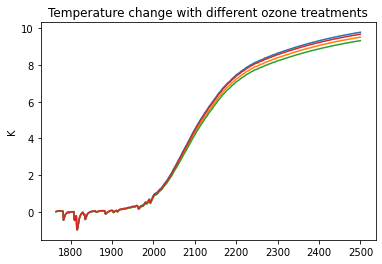

In [3]:
for ozone_treatment in ['cmip6-old tuning/no feedback', 'stevenson', 'regression', 'thornhill-skeie']:
    pl.plot(np.arange(1765, 2501), T[ozone_treatment], label=ozone_treatment)
pl.ylabel('K')
pl.title('Temperature change with different ozone treatments')